### **Packages:**


---




In [0]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Data setup**:


---

In [0]:
!mkdir data

In [3]:
!pip install kaggle

In [9]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
# token = {'username':'hemantkshirsagar8','key':''}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [14]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle competitions download -c mlsp-2014-mri -p /content/data

  0% 0.00/2.04k [00:00<?, ?B/s]
100% 2.04k/2.04k [00:00<00:00, 6.07MB/s]
  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 37.7MB/s]
 99% 189M/192M [00:05<00:00, 27.0MB/s]
100% 192M/192M [00:05<00:00, 34.5MB/s]
  0% 0.00/287k [00:00<?, ?B/s]
100% 287k/287k [00:00<00:00, 92.8MB/s]
 35% 5.00M/14.3M [00:00<00:00, 19.6MB/s]
100% 14.3M/14.3M [00:00<00:00, 47.5MB/s]


In [17]:
!unzip /content/data/\*.zip -d /content/data/

Archive:  /content/data/Train.zip
  inflating: /content/data/train_FNC.csv  
  inflating: /content/data/train_labels.csv  
  inflating: /content/data/train_SBM.csv  

Archive:  /content/data/submission_example.csv.zip
  inflating: /content/data/submission_example.csv  

Archive:  /content/data/HelperCode.zip
  inflating: /content/data/load_features.R  
  inflating: /content/data/load_features.m  

Archive:  /content/data/Test.zip
  inflating: /content/data/test_FNC.csv  
  inflating: /content/data/test_SBM.csv  

Archive:  /content/data/AdditionalInformation.zip
  inflating: /content/data/load_maps.R  
  inflating: /content/data/gm_sMRI_ica_maps.pdf  
  inflating: /content/data/rs_fMRI_ica_maps.pdf  
  inflating: /content/data/aal_labels_naming.m  
  inflating: /content/data/load_AAL.m  
  inflating: /content/data/load_maps.m  
  inflating: /content/data/show_maps.m  
  inflating: /content/data/comp_ind_fMRI.csv  
  inflating: /content/data/comp_ind_sMRI.csv  
  inflating: /content/dat

In [0]:
!rm -r /content/data/*.zip
# !rm -r /content/data/*.m
# !rm -r /content/data/*.R
# !rm -r /content/data/*.nii

### **About Data:**



---



**Train.zip:**

**train_labels.csv** - Labels for the training set. The labels are indicated in the "Class" column. 0 = 'Healthy Control', 1 = 'Schizophrenic Patient'

**train_FNC.csv** - FNC features for the training set. These are correlation values. They describe the connection level between pairs of brain maps over time.

**train_SBM.csv** - SBM features for the training set. These are standardized weights. They describe the expression level of ICA brain maps derived from gray-matter concentration.

**Test.zip:**

**test_FNC.csv** - FNC features for the test set. Test subject labels have been removed. Your task is to predict these unknown labels from the provided features.

**test_SBM.csv** - SBM features for the test set. Test subject labels have been removed.


**About FNC Features:**

Functional Network Connectivity (FNC) are correlation values that summarize the overall connection between independent brain maps over time. Therefore, the FNC feature gives a picture of the connectivity pattern over time between independent networks (or brain maps). The provided FNC information was obtained from functional magnetic resonance imaging (fMRI) from a set of schizophrenic patients and healthy controls at rest, using group independent component analysis (GICA). The GICA decomposition of the fMRI data resulted in a set of brain maps, and corresponding timecourses. 

These timecourses indicated the activity level of the corresponding brain map at each point in time. The FNC feature are the correlations between these timecourses. In a way, FNC indicates a subject's overall level of 'synchronicity' between brain areas. Because this information is derived from functional MRI scans, FNCs are considered a functional modality feature (i.e., they describe patterns of the brain function). More about FNCs can be found here: [FNC paper](http://cercor.oxfordjournals.org/content/early/2012/11/09/cercor.bhs352.abstract).

**About SBM Loadings:**

Source-Based Morphometry (SBM) loadings correspond to the weights of brain maps obtained from the application of independent component analysis (ICA) on the gray-matter concentration maps of all subjects. Gray-matter corresponds to the outer-sheet of the brain; it is the brain region in which much of the brain signal processing actually occurs. In a way, the concentration of gray-matter is indicative of the "computational power" available in a certain region of the brain. Processing gray-matter concentration maps with ICA yields independent brain maps whose expression levels (i.e., loadings) vary across subjects. 

Simply put, a near-zero loading for a given ICA-derived brain map indicates that the brain regions outlined in that map are lowly present in the subject (i.e., the gray-matter concentration in those regions are very low in that subject). Because this information is derived from structural MRI scans, SBM loadings are considered a structural modality feature (i.e., they describe patterns of the brain structure). More about SBM loadings can be found here: [SBM paper](http://www.ncbi.nlm.nih.gov/pubmed/22470337).

Further details about data can be found here, at [kaggle competition](https://www.kaggle.com/c/mlsp-2014-mri/data).


Done.

### **Data Analysis:**


---



In [0]:
train_FNC = pd.read_csv('./data/train_FNC.csv')
train_SBM = pd.read_csv('./data/train_SBM.csv')
y = pd.read_csv('./data/train_labels.csv')

In [20]:
train_FNC.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,...,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,...,-0.29504,0.10551,0.30505,0.432070,0.556880,0.46394,0.018254,-0.188530,0.086159,-0.238100,0.25122,0.58942,0.542530,0.183010,-0.23049,0.093536,-0.024040,0.470320,0.29130,0.098155,0.047888,-0.134690,-0.23674,0.348840,0.40354,0.28671,0.27811,0.31830,0.37908,-0.060204,0.18743,0.163770,0.17686,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,-0.376340,0.142640,-0.088119,-0.056629,-0.479970,0.25017,0.20565,0.100910,0.090710,-0.041637,-0.33688,0.223350,0.19753,0.40784,0.221110,-0.017778,-0.019428,0.62700,0.48108,0.450290,0.45691,0.19346,0.70298,0.685360,0.543640,0.67527,0.244000,0.512400,0.396410,...,0.47717,0.27306,0.71654,0.561570,-0.091094,0.11545,0.420580,0.631940,0.731340,-0.274750,0.59071,0.83211,-0.032933,-0.025029,-0.31699,-0.094311,0.294930,0.188810,0.01650,0.210740,0.456090,0.091578,-0.47742,0.013968,0.20574,0.48151,0.49290,0.21511,0.44880,0.369300,0.59834,-0.477880,0.26634,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,-0.027871,0.424240,-0.361020,-0.256640,0.013372,0.24679,0.06869,0.122810,-0.491070,-0.016317,-0.29430,0.189520,0.37337,-0.33428,0.532240,-0.059252,-0.376230,0.46884,0.22889,0.203270,0.22383,0.31407,0.51565,0.079927,0.114280,0.35020,0.262910,0.018740,0.051793,...,-0.36236,0.32105,0.37874,-0.258550,-0.312070,0.59020,0.449510,0.041927,0.729640,-0.592430,0.32563,0.75814,0.075444,-0.420990,-0.17144,-0.175620,0.041856,0.042524,-0.34176,0.377860,0.071924,0.539140,-0.55848,0.152460,0.45270,0.55959,0.46717,-0.15872,0.17388,0.521330,0.22866,-0.000816,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0.048550,-0.080789,-0.060777,0.260040,0.154730,0.16130,0.21598,0.153080,0.503730,0.148900,0.18326,0.021985,0.40514,0.52879,0.300160,0.323960,0.328850,0.74485,0.70518,0.658060,0.54178,0.38055,0.64302,0.298820,0.589520,0.53017,0.485810,0.574150,0.509770,...,-0.24084,0.50273,0.76808,-0.075026,0.190440,0.45596,0.161080,0.449680,0.609100,0.177100,0.42164,0.57511,0.521790,0.735700,0.27329,0.207670,0.425530,0.244690,0.23583,0.493320,0.599920,0.312640,0.26743,0.279880,0.42898,0.39231,0.13384,0.49211,0.34309,0.144460,0.42881,0.711570,0.56593,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,-0.031034,0.559150,0.048705,0.156080,0.008678,0.62856,0.55702,0.191120,0.040825,0.373060,-0.44247,0.119220,-0.34615,-0.51165,0.452220,-0.160560,-0.606830,0.28326,0.21766,0.158000,0.24057,0.28307,0.25707,-0.072729,0.152580,0.13349,-0.105510,-0.234190,0.183910,...,-0.39077,0.51207,0.29410,-0.453800,0.073685,0.18873,0.128680,-0.276260,0.202700,-0.045402,0.15311,0.20027,-0.353570,0.396270,-0.49929,-0.618850,0.569730,-0.323330,-0.57656,-0.286060,0.378360,0.753900,-0.84422,0.333820,0.68311,-0.23637,-0.35586,0.44029,-0.40981,-0.179310,0.41688,-0.435600

In [21]:
train_SBM.head()

,Id,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,120873,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,0.137624,0.098926,-0.179555,-1.257417,-0.426855,-1.062109,0.866065,-0.409747,-0.388249,1.641117,0.439271,0.791762,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,135376,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,0.972934,-0.177950,0.742952,1.175508,0.083895,0.044317,1.154924,1.034574,-0.612464,0.516993,-0.875616,-0.073326,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,139149,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,-1.488153,-0.202826,2.034083,0.323568,-1.676738,0.414747,0.498362,-1.212714,1.249961,0.507938,1.360176,-0.910225,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,146791,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,0.187573,-0.355915,0.064853,0.159363,-2.018822,-0.026555,-0.732960,-0.981925,0.440149,-3.060313,-0.331995,-3.013096,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,153870,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,1.561833,1.961955,-0.420548,0.956431,-0.873050,0.673888,-1.027496,-0.012389,0.082437,1.293312,0.577215,-0.499647,0.474353,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440


In [22]:
y.head()

,Id,Class
0,120873,1
1,135376,0
2,139149,0
3,146791,0
4,153870,1


In [0]:
test_FNC = pd.read_csv('./data/test_FNC.csv')
test_SBM = pd.read_csv('./data/test_SBM.csv')
comp_ind_fMRI = pd.read_csv('./data/comp_ind_fMRI.csv')
comp_ind_sMRI = pd.read_csv('./data/comp_ind_sMRI.csv')
rs_fMRI_FNC_mapping = pd.read_csv('./data/rs_fMRI_FNC_mapping.csv')

In [24]:
test_FNC.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,...,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,100004,0.476127,0.064466,0.053238,-0.608133,0.073988,-0.637039,0.113556,-0.192434,-0.004025,-0.060474,-0.256244,-0.239706,0.113166,-0.136103,-0.322507,0.299439,0.492948,0.233049,-0.312542,0.210541,-0.521582,0.323302,-0.161545,-0.122164,0.369105,0.640831,0.041661,0.196605,0.128142,0.304551,0.352879,0.416197,0.678723,0.277782,0.676364,-0.133499,0.102174,0.022148,0.136891,...,-0.323568,0.415299,0.580612,-0.296234,0.700717,-0.098439,0.185673,0.380953,0.433161,-0.405556,0.374340,0.495940,-0.059396,0.136818,-0.483997,0.555808,-0.356607,0.100753,-0.320402,-0.112517,0.460471,0.386452,-0.073664,0.001062,0.153605,0.734810,0.317646,-0.097210,-0.122540,0.150698,0.482131,0.022525,-0.034251,-0.103903,-0.497701,0.079286,0.265937,0.379066,-0.630483,-0.309032
1,100015,0.013833,0.267183,0.232178,-0.167151,-0.261327,0.191869,0.406493,0.088761,0.177048,0.036718,-0.656346,0.415506,-0.054457,-0.401238,-0.321115,0.186433,0.585713,0.437911,-0.307749,-0.029330,-0.134603,-0.289691,0.009930,0.603237,-0.005077,0.381680,-0.135795,0.187608,0.716543,0.315034,-0.408325,0.617800,0.770686,0.181813,0.787717,0.605197,0.366940,-0.299074,0.421012,...,-0.377365,0.286297,0.682911,0.095391,0.388988,0.311717,-0.231560,0.310637,0.782427,0.009134,0.152884,0.510705,0.463462,0.043892,-0.252089,0.079247,-0.426585,0.385604,0.623455,0.286064,0.263112,0.218903,-0.589047,-0.113545,0.311255,0.030508,0.380939,0.297206,0.537560,0.318086,0.387964,0.288442,0.503947,-0.221215,-0.949426,0.340575,0.767685,0.417164,0.194081,-0.218685
2,100026,-0.435452,0.046780,0.243742,0.397030,-0.147821,0.173620,-0.461963,-0.610736,0.419753,0.400985,-0.220077,0.287517,0.002372,-0.332512,0.008532,0.366046,0.562904,0.238146,0.014265,-0.425968,-0.499350,0.067169,0.292784,0.211195,0.563133,0.231455,-0.313893,0.561810,-0.012589,-0.108333,0.608448,0.309184,-0.058818,0.137444,0.316538,0.058696,0.081580,0.113453,-0.623393,...,-0.701107,0.416079,0.510617,0.125767,-0.218539,0.609401,0.073030,0.217984,0.485754,0.040364,0.600444,-0.003409,0.268395,-0.213212,0.294130,-0.090743,0.051929,0.244618,0.234822,0.167235,0.324517,0.168946,0.434138,0.008318,-0.315736,0.485861,0.731697,-0.249642,-0.361329,0.093333,-0.388256,0.052361,0.759901,0.478927,-0.164136,-0.096020,0.607880,0.099879,-0.429554,0.453645
3,100030,-0.204510,-0.036735,-0.760705,-0.740495,0.064668,0.349926,-0.273826,-0.174384,-0.120248,0.175618,-0.122505,0.379375,0.040945,0.106041,-0.150561,0.114257,0.553867,-0.371839,-0.495213,-0.274343,-0.496839,0.405451,0.293438,0.546172,-0.355862,-0.053801,-0.492059,0.082710,0.113686,0.675230,-0.263651,0.451183,0.537128,-0.226750,0.124338,0.304847,0.073727,0.278834,0.279822,...,-0.498579,-0.230756,0.376818,-0.510979,0.136534,-0.190452,0.526877,-0.316290,0.570783,-0.119866,-0.107237,0.632972,-0.376752,0.727788,-0.270263,-0.712554,0.202652,-0.372602,0.049370,-0.717746,0.392160,0.719406,-0.526902,0.461217,0.267554,0.314762,0.682848,0.291971,0.462893,0.442313,0.406804,0.169224,0.001855,0.324120,-0.212088,0.344033,0.234451,0.214809,-0.138947,0.436006
4,100047,0.599435,-0.166441,0.122431,0.011539,0.346906,-0.017430,-0.274734,0.211510,0.151012,-0.033434,-0.286008,-0.024012,-0.245284,-0.280592,-0.278775,0.555220,-0.241175,-0.184943,0.558418,-0.313958,0.044287,0.554710,0.249658,0.594015,-0.245845,-0.426244,0.252298,0.023092,0.672685,0.624100,0.080206,0.622279,0.294196,0.088422,0.332166,0.467401,0.447499,0.264495,0.373256,...,-0.490835,0.626051,-0.352886,-0.072454,0.234495,0.436001,0.459640,-0.428985,0.357173,0.026662,0.50874

In [25]:
test_SBM.head()

,Id,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,100004,1.154881,3.627246,0.146076,-0.677521,0.951169,0.482531,-2.404130,-0.715182,-0.475299,-0.896095,2.256762,0.567271,0.796897,-0.617875,0.616627,-2.011786,-0.514364,-0.000241,0.025560,-0.184531,-0.538563,0.139369,-0.451994,1.123770,2.083006,1.145440,-0.067608,1.202529,0.851587,0.451583,-0.159739,0.192076
1,100015,-1.608977,-0.125656,2.232224,1.013575,1.227375,0.296077,-0.612468,-1.610222,-0.136698,0.039142,1.711094,0.908302,-0.930560,-0.900517,-0.865214,0.185261,0.726653,1.492725,-1.508538,1.732360,4.317689,-2.084801,0.696987,1.397832,1.046136,-0.191733,-2.192023,-0.369276,0.822225,-0.109342,-0.580476,0.174160
2,100026,1.611464,1.859449,-0.959714,-0.713587,0.826513,-0.405989,-0.752907,-0.484180,-1.212576,0.679237,1.386814,0.974427,-0.362832,0.106783,-0.136973,-0.123830,0.589357,0.867600,2.357174,-1.374768,-1.572011,0.046525,0.160145,1.906989,-2.661633,-0.193911,0.440873,0.641739,0.918397,-0.758046,0.154702,-0.476647
3,100030,-0.283111,-0.418010,1.962834,-0.342130,-0.939108,0.929705,1.041755,-1.073416,-0.815344,-1.945322,-0.949757,1.275905,-1.389023,0.561610,2.226175,0.167515,0.375615,-0.318241,-2.162269,-0.135170,0.553775,-1.693663,0.974828,-1.997087,-2.083782,1.154107,-0.643947,2.332424,0.659124,-0.809445,0.558960,2.790871
4,100047,-0.688717,1.951002,1.512576,-0.854993,1.059652,-0.179238,-1.775324,0.649346,1.616116,0.985532,0.415556,-0.063359,1.356835,1.181061,-1.149081,2.410666,-0.125726,-2.925785,1.400921,-0.319947,1.480964,0.021838,-0.789153,1.578984,1.402592,-1.230440,0.296686,2.806314,0.427184,-0.240682,-0.196948,-1.544345


In [26]:
comp_ind_fMRI.head()

,fMRI_comp_ind
0,7
1,17
2,20
3,21
4,23


In [27]:
comp_ind_sMRI.head()

,sMRI_comp_ind
0,1
1,2
2,3
3,4
4,5


In [28]:
rs_fMRI_FNC_mapping.head()

,FNC,mapA,mapB
0,1,21,17
1,2,21,7
2,3,21,23
3,4,21,24
4,5,21,38


In [0]:
train = pd.merge(train_FNC, train_SBM, how='left', on='Id')
test = pd.merge(test_FNC, test_SBM, how='left', on='Id')

In [53]:
train.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,...,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,...,0.17686,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,0.137624,0.098926,-0.179555,-1.257417,-0.426855,-1.062109,0.866065,-0.409747,-0.388249,1.641117,0.439271,0.791762,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,-0.376340,0.142640,-0.088119,-0.056629,-0.479970,0.25017,0.20565,0.100910,0.090710,-0.041637,-0.33688,0.223350,0.19753,0.40784,0.221110,-0.017778,-0.019428,0.62700,0.48108,0.450290,0.45691,0.19346,0.70298,0.685360,0.543640,0.67527,0.244000,0.512400,0.396410,...,0.26634,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,0.972934,-0.177950,0.742952,1.175508,0.083895,0.044317,1.154924,1.034574,-0.612464,0.516993,-0.875616,-0.073326,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,-0.027871,0.424240,-0.361020,-0.256640,0.013372,0.24679,0.06869,0.122810,-0.491070,-0.016317,-0.29430,0.189520,0.37337,-0.33428,0.532240,-0.059252,-0.376230,0.46884,0.22889,0.203270,0.22383,0.31407,0.51565,0.079927,0.114280,0.35020,0.262910,0.018740,0.051793,...,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,-1.488153,-0.202826,2.034083,0.323568,-1.676738,0.414747,0.498362,-1.212714,1.249961,0.507938,1.360176,-0.910225,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0.048550,-0.080789,-0.060777,0.260040,0.154730,0.16130,0.21598,0.153080,0.503730,0.148900,0.18326,0.021985,0.40514,0.52879,0.300160,0.323960,0.328850,0.74485,0.70518,0.658060,0.54178,0.38055,0.64302,0.298820,0.589520,0.53017,0.485810,0.574150,0.509770,...,0.56593,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,0.187573,-0.355915,0.064853,0.159363,-2.018822,-0.026555,-0.732960,-0.981925,0.440149,-3.060313,-0.331995,-3.013096,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,-0.031034,0.559150,0.048705,0.156080,0.008678,0.62856,0.55702,0.191120,0.040825,0.373060,-0.44247,0.119220,-0.34615,-0.51165,0.452220,-0.160560,-0.606830,0.28326,0.21766,0.158000,0.24057,0.28307,0.25707,-0.072729,0.152580,0.13349,-0.105510,-0.234190,0.183910,...,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.31281,-0.829640,0.24307,-0.208685,-0.562697,-0.362164,1.02

In [0]:
train = pd.merge(train, y, how='left', on='Id')

In [57]:
train.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,...,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75,Class
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,...,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,0.137624,0.098926,-0.179555,-1.257417,-0.426855,-1.062109,0.866065,-0.409747,-0.388249,1.641117,0.439271,0.791762,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006,1
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,-0.376340,0.142640,-0.088119,-0.056629,-0.479970,0.25017,0.20565,0.100910,0.090710,-0.041637,-0.33688,0.223350,0.19753,0.40784,0.221110,-0.017778,-0.019428,0.62700,0.48108,0.450290,0.45691,0.19346,0.70298,0.685360,0.543640,0.67527,0.244000,0.512400,0.396410,...,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,0.972934,-0.177950,0.742952,1.175508,0.083895,0.044317,1.154924,1.034574,-0.612464,0.516993,-0.875616,-0.073326,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125,0
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,-0.027871,0.424240,-0.361020,-0.256640,0.013372,0.24679,0.06869,0.122810,-0.491070,-0.016317,-0.29430,0.189520,0.37337,-0.33428,0.532240,-0.059252,-0.376230,0.46884,0.22889,0.203270,0.22383,0.31407,0.51565,0.079927,0.114280,0.35020,0.262910,0.018740,0.051793,...,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,-1.488153,-0.202826,2.034083,0.323568,-1.676738,0.414747,0.498362,-1.212714,1.249961,0.507938,1.360176,-0.910225,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434,0
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0.048550,-0.080789,-0.060777,0.260040,0.154730,0.16130,0.21598,0.153080,0.503730,0.148900,0.18326,0.021985,0.40514,0.52879,0.300160,0.323960,0.328850,0.74485,0.70518,0.658060,0.54178,0.38055,0.64302,0.298820,0.589520,0.53017,0.485810,0.574150,0.509770,...,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,0.187573,-0.355915,0.064853,0.159363,-2.018822,-0.026555,-0.732960,-0.981925,0.440149,-3.060313,-0.331995,-3.013096,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966,0
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,-0.031034,0.559150,0.048705,0.156080,0.008678,0.62856,0.55702,0.191120,0.040825,0.373060,-0.44247,0.119220,-0.34615,-0.51165,0.452220,-0.160560,-0.606830,0.28326,0.21766,0.158000,0.24057,0.28307,0.25707,-0.072729,0.152580,0.13349,-0.105510,-0.234190,0.183910,...,0.392960,-0.842430,0.425080,0.86509,-0.31281,-0.829640,0.24307,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922

In [58]:
train.Class.unique()

array([1, 0])

In [0]:
y = pd.get_dummies(X_train['Class'], columns = ['y'], prefix = ['y'], drop_first = True)

In [60]:
y.head()

,['y']_1
0,1
1,0
2,0
3,0
4,1


In [69]:
train = train.iloc[:, 1:-1]
train.head()

,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,...,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,-0.365520,...,0.17686,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,0.137624,0.098926,-0.179555,-1.257417,-0.426855,-1.062109,0.866065,-0.409747,-0.388249,1.641117,0.439271,0.791762,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,-0.376340,0.142640,-0.088119,-0.056629,-0.479970,0.25017,0.20565,0.100910,0.090710,-0.041637,-0.33688,0.223350,0.19753,0.40784,0.221110,-0.017778,-0.019428,0.62700,0.48108,0.450290,0.45691,0.19346,0.70298,0.685360,0.543640,0.67527,0.244000,0.512400,0.396410,0.439300,...,0.26634,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,0.972934,-0.177950,0.742952,1.175508,0.083895,0.044317,1.154924,1.034574,-0.612464,0.516993,-0.875616,-0.073326,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,-0.027871,0.424240,-0.361020,-0.256640,0.013372,0.24679,0.06869,0.122810,-0.491070,-0.016317,-0.29430,0.189520,0.37337,-0.33428,0.532240,-0.059252,-0.376230,0.46884,0.22889,0.203270,0.22383,0.31407,0.51565,0.079927,0.114280,0.35020,0.262910,0.018740,0.051793,0.088855,...,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,-1.488153,-0.202826,2.034083,0.323568,-1.676738,0.414747,0.498362,-1.212714,1.249961,0.507938,1.360176,-0.910225,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0.048550,-0.080789,-0.060777,0.260040,0.154730,0.16130,0.21598,0.153080,0.503730,0.148900,0.18326,0.021985,0.40514,0.52879,0.300160,0.323960,0.328850,0.74485,0.70518,0.658060,0.54178,0.38055,0.64302,0.298820,0.589520,0.53017,0.485810,0.574150,0.509770,0.344040,...,0.56593,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,0.187573,-0.355915,0.064853,0.159363,-2.018822,-0.026555,-0.732960,-0.981925,0.440149,-3.060313,-0.331995,-3.013096,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,-0.031034,0.559150,0.048705,0.156080,0.008678,0.62856,0.55702,0.191120,0.040825,0.373060,-0.44247,0.119220,-0.34615,-0.51165,0.452220,-0.160560,-0.606830,0.28326,0.21766,0.158000,0.24057,0.28307,0.25707,-0.072729,0.152580,0.13349,-0.105510,-0.234190,0.183910,-0.127320,...,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.31281,-0.829640,0.24307,-0.208685,-0.562697

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [71]:
y_test.head()

,['y']_1
16,1
37,0
50,0
48,0
56,0


In [72]:
X_train.head()

,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,...,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
72,-0.013829,-0.13278,-0.061013,-0.046842,0.460410,-0.046959,-0.24142,0.14688,-0.32512,-0.132950,-0.369840,-0.223600,-0.31357,0.076672,-0.173170,0.14692,0.25283,0.072070,0.194250,-0.027869,-0.000368,0.130090,0.62289,0.385090,0.25782,0.502140,0.30324,0.756980,-0.030554,0.400320,0.17705,0.42448,0.331060,-0.17935,0.33530,0.603330,0.53166,0.61877,0.494050,-0.098532,...,0.556390,0.39158,-0.20124,0.389110,0.71587,0.54304,-0.148760,0.392560,0.773695,1.290199,0.698551,-0.190710,0.552289,-0.005388,-0.458786,0.146475,0.489503,-1.536736,-1.258436,0.530414,0.458931,0.224828,0.847388,1.441892,1.232374,-2.392854,-0.281775,-0.276847,0.446913,0.332317,-0.624069,1.421189,2.009513,0.245642,1.548733,0.750769,-0.982717,0.111729,-0.379738,1.059759
33,0.383180,0.02836,-0.230550,-0.382360,0.266550,0.467390,-0.10860,-0.18587,0.21089,0.053196,0.276810,-0.147950,-0.50762,-0.039748,0.187930,0.30818,0.57079,-0.023912,-0.243880,-0.191000,-0.335350,0.011938,0.20164,0.270380,0.29345,-0.005694,0.00496,0.388340,0.080153,0.370200,0.62125,0.58131,0.704240,0.04463,0.59726,0.397050,0.48478,0.45957,0.186200,0.182420,...,0.420580,0.22617,-0.10325,-0.327410,0.36167,0.68942,-0.203020,-0.300870,0.409426,0.383377,-1.572554,-0.449497,0.095564,0.057798,1.031156,0.127773,-0.096832,-0.154095,-0.652425,-0.353194,-0.451582,-1.396322,0.630486,-0.217495,-0.825184,-1.000004,0.397160,-0.692264,0.966357,-1.377846,-0.435571,0.925047,-0.602902,-1.115241,0.529304,0.378057,-0.257272,-0.821654,0.087657,0.243221
14,0.060503,0.13650,0.060136,0.037945,-0.005477,0.135840,-0.39565,0.12696,-0.11676,0.211160,0.245750,-0.020157,-0.26272,-0.270620,-0.084068,0.11541,-0.15025,0.112990,-0.242540,0.051214,-0.194010,0.297820,0.11453,0.080388,0.28507,0.479530,-0.04503,0.005065,0.241160,0.326420,0.32699,0.32060,0.225860,0.30201,0.41078,-0.002886,-0.20474,0.42500,-0.075567,-0.120420,...,0.496060,0.12472,-0.24302,0.118180,0.54045,0.46961,-0.207780,0.037045,1.045568,0.694996,0.719130,0.581833,-0.924854,1.210276,-0.351623,1.048087,0.863717,0.376738,-0.979308,0.356881,-1.378489,-0.176907,-1.161353,0.706268,-0.454271,-1.075476,-0.454513,0.001527,1.543609,0.625577,-0.788986,-1.936309,1.208010,1.746816,0.692747,-0.910829,-0.846486,0.373370,0.110398,-1.480812
58,0.197000,0.21266,0.084582,-0.059204,-0.168610,0.003684,-0.01530,0.40442,0.28990,0.139130,0.041086,0.157530,-0.44558,-0.044103,-0.123340,0.35948,0.30352,-0.010981,0.027304,0.233270,-0.217720,0.059961,0.19980,0.350690,0.28473,0.202970,0.16781,-0.066132,-0.002711,0.051476,0.26078,0.25140,0.057134,0.51449,0.13620,0.265530,0.10138,0.32789,-0.222280,-0.302500,...,0.034243,0.30553,0.32970,0.094974,0.30144,0.41493,-0.038615,0.556140,1.086709,0.218556,1.067440,0.381258,0.096521,0.653237,0.102550,-1.693555,0.684690,1.379589,0.520785,0.394417,1.630778,1.142616,1.117918,0.886963,0.925786,1.036426,0.714465,1.889326,-0.618363,2.683994,1.884878,1.242399,-0.035531,0.855635,1.502916,1.884491,-2.852879,-0.203042,0.812584,0.034357
51,0.567620,0.44471,0.228980,0.298230,0.503460,0.544820,0.23806,0.24857,0.51528,0.078170,0.376000,-0.035319,0.14415,0.067386,-0.406080,-0.33821,-0.15080,0.016211,0.030259,0.048202,0.027456,-0.047863,0.57596,-0.057652,-0.22574,0.162140,0.21938,0.362170,-0.120210,0.048995,0.31355,0.29535,0.187610,0.14368,0.45400,0.262930,0.44024,0.45051,0.075418,0.151270,...,0.610730,0.22369,0.27674,0.047258,0.66606,0.50645,-0.014922,0.176160,-1.331766,0.194993,-1.08659

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [74]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8 1]
 [3 5]]
76.0


k=1 63.10 (+/- 13.52)
k=2 59.05 (+/- 17.75)
k=3 62.14 (+/- 17.51)
k=4 60.95 (+/- 17.92)
k=5 63.81 (+/- 15.82)
k=6 70.95 (+/- 14.36)
k=7 65.24 (+/- 15.80)
k=8 65.24 (+/- 19.29)
k=9 63.33 (+/- 13.35)
k=10 69.52 (+/- 12.95)
k=11 66.19 (+/- 8.90)
k=12 65.48 (+/- 19.14)
k=13 66.43 (+/- 18.94)
k=14 63.81 (+/- 15.35)
k=15 61.67 (+/- 19.53)
k=16 63.33 (+/- 11.08)
k=17 66.19 (+/- 16.04)
k=18 67.62 (+/- 10.61)
k=19 64.29 (+/- 16.11)
k=20 64.76 (+/- 9.09)
k=21 63.10 (+/- 15.91)
k=22 58.81 (+/- 17.82)
k=23 61.43 (+/- 17.10)
k=24 61.67 (+/- 13.32)
k=25 58.57 (+/- 17.57)
The optimal number of neighbors is 5 with 71.0%


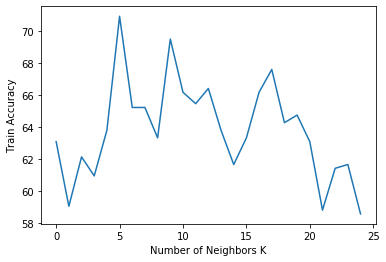

In [75]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(train, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8 1]
 [7 1]]
53.0


In [77]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8 1]
 [4 4]]
71.0


In [78]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[3 6]
 [4 4]]
41.0


In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6 3]
 [4 4]]
59.0


In [80]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6 3]
 [4 4]]
59.0


In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[6 3]
 [4 4]]
59.0


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[4 5]
 [5 3]]
41.0


In [83]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
5,Gausian NB,0.771429
6,XGBoost,0.680357
4,Logistic Model,0.657143
0,Random Forest Classifier,0.640476
1,Decision Tree Classifier,0.635714
2,Support Vector Machine,0.597619
7,Gradient Boosting,0.564286
3,K-Near Neighbors,0.554762


**Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.**

**A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:**

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

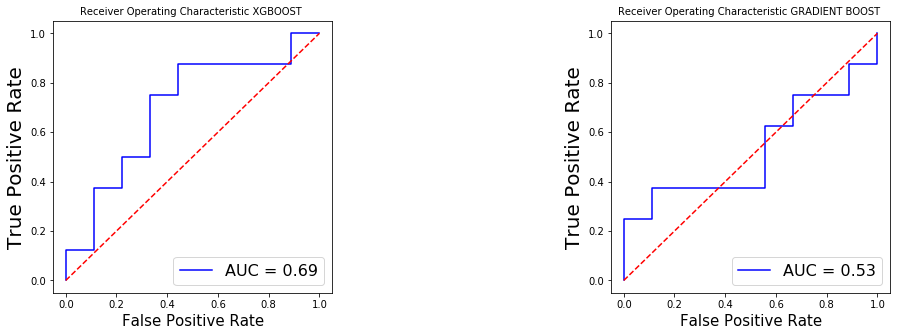

In [84]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)


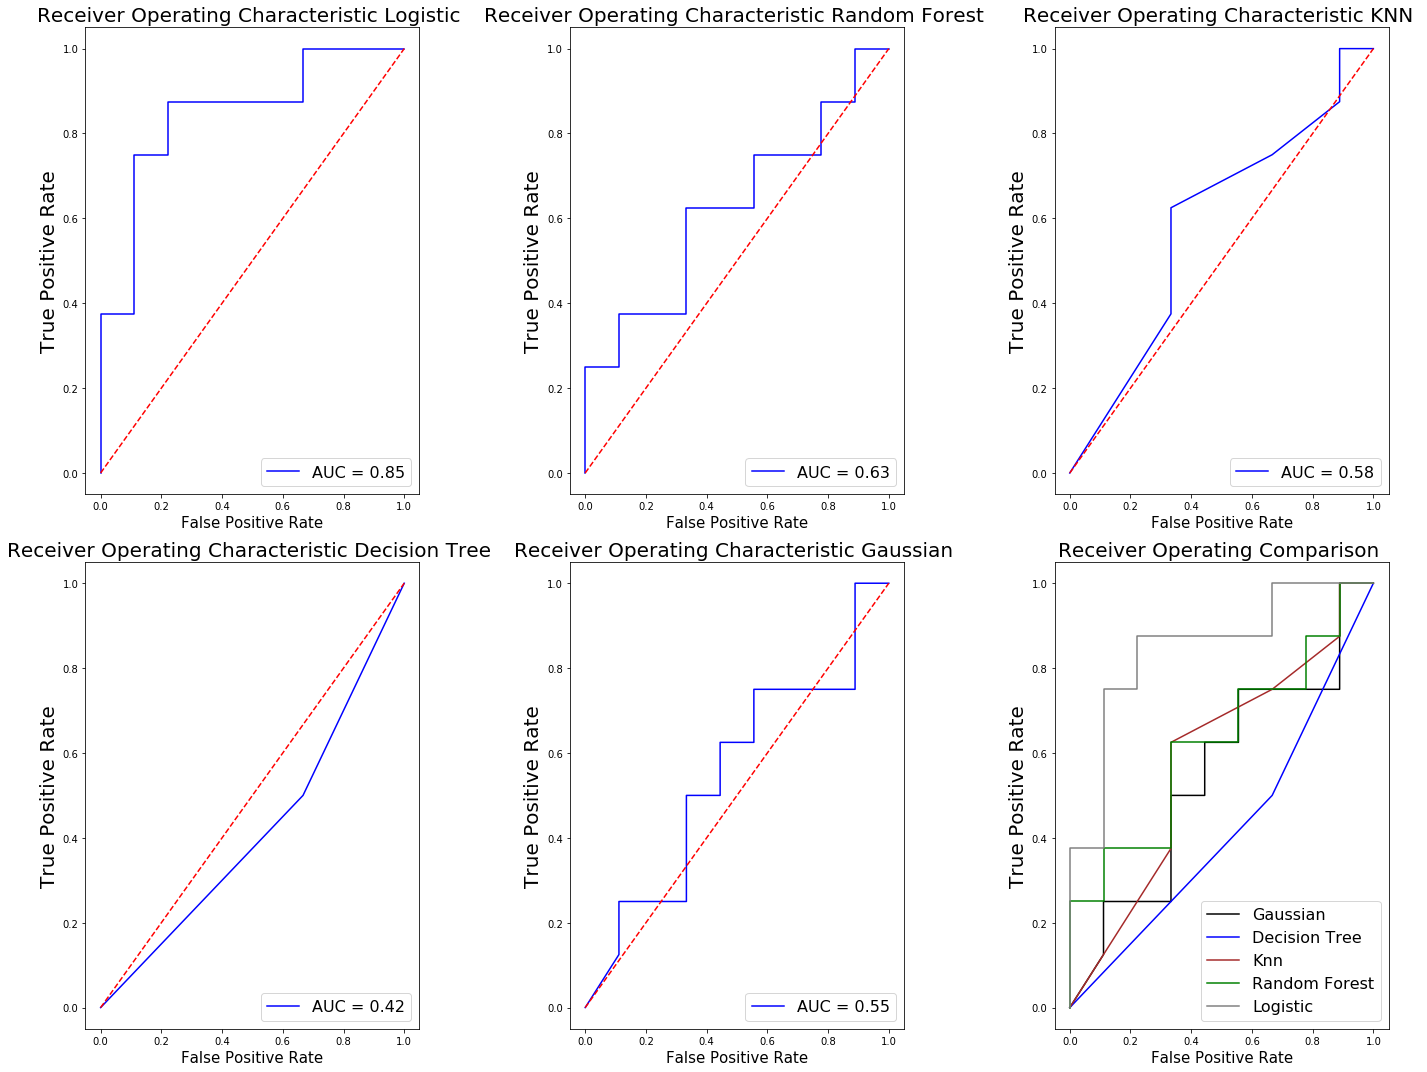

In [85]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

### ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**
- False Positive, I'll add more flesh here.
- False Negative, I'll add more flesh here.

**In my opinion:**
- I'll add more flesh here.

### So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.
Obs1 - lets go back and look the best confusion matrix that attend this criteria
Obs2 - i'll do the math manualy to be more visible and understanding

In [0]:
from sklearn.metrics import classification_report

In [87]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix
 [[8 1]
 [7 1]]


In [88]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
               precision    recall  f1-score   support

           0       0.53      0.89      0.67         9
           1       0.50      0.12      0.20         8

    accuracy                           0.53        17
   macro avg       0.52      0.51      0.43        17
weighted avg       0.52      0.53      0.45        17

